# Trabalho final da disciplina Introdução ao aprendizado de máquina.
Autor: Marcelo Paiva

A busca pela base de dados para trabalhar foi baseada na identificação de problemas de empresas para os quais as técnicas de machine learning podem gerar soluções úteis. Para isso, foi usada a ferramenta de busca na plataforma Kaggle, buscando os termos "Customer Segmentation” e navegando através de bases de dados relacionadas.

O problema escolhido está relacionado com uma campanha a ser realizada pelo Ifood. A empresa deseja prever se seus consumidores irão aceitar ou não uma oferta a ser realizada em uma próxima campanha. A empresa tem os seguintes dados dos consumidores:


In [1]:
from IPython import display

In [2]:
cd marceloml/

/home/mpaiva/FEA/7/machine_learning/projeto-final/marceloml


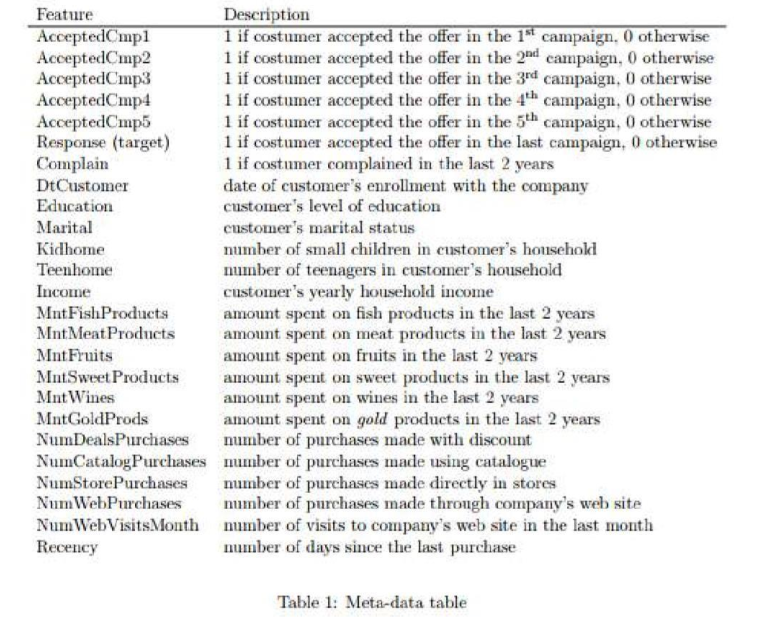

In [3]:
display.Image("dictionary.png")

A base de dados contém informações de 2206 clientes, considerando informações como o aceite de ofertas anteriores, reclamações recentes, valor gasto em diferentes tipos de produtos, número de compras em diferentes canais, bem como características sociodemográficas. Os dados do problema podem ser encontrados em: https://github.com/nailson/ifood-data-business-analyst-test

A análise realizada pelo autor Nailson será usada como solução base-line. Ele usou o algoritmo de classificação Random Forest, separando o conjunto de teste e treinamento na proporção 40% e 60%, respectivamente. A acurácia encontrada foi de 87%, e o código da solução pode ser encontrado em: 
https://github.com/nailson/ifood-data-business-analyst-test/blob/master/classification_model.ipynb

O algoritmo usado por Nailson foi testado e rodou com sucesso na minha máquina. Para que seja possível testar outros modelos classificadores, mantendo intocado o conjunto de teste, foi separada uma amostra dentro do conjunto de treinamento que será usada para validação. A separação dentro do conjunto de treinamento e validação foi de 80% e 20% dos dados. Sendo assim, o conjunto de teste terá 882 dados, o conjunto de treinamento terá 1060 dados e o de validação terá 264.

Os objetivos do trabalho foram encontrar algoritmos com maiores scores, dando preferência aos mais simples (tanto na compreensão matemática quanto na implementação e no tempo dispendido). Para isso, diferentes parâmetros foram usados para tentar melhorar a qualidade dos classificadores. Além disso, tentei identificar as principais features capazes de predizer o resultado de interesse, com a premissa de que elas devem ser mantidas na manutenção da base de dados. Com as principais features, também houve uma breve tentativa de fazer uma visualização exploratória dos dados usando a biblioteca matplotlib.

Os algoritmos testados foram de Regressão Logística, SVM, e Multi Layer Perceptron, com e sem padronização das features. A implementação desses algoritmos foi feita em python, usando as bibliotecas pandas, numpy e scikitlearn. Os melhores resultados foram obtidos com Regressão Logística sem padronização das features e com SVM com padronização das features. A acurácia encontrada foi de 0.89, 2% a mais que a solução baseline. Os outros modelos também pontuaram mais que a solução baseline, exceto o SVM sem padronização das features. A matriz de confusão pode indicar o melhor modelo caso haja preferência por minimizar a possibilidade de falsos negativos ou falsos positivos.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import time

In [5]:
cd marceloml/

/home/mpaiva/FEA/7/machine_learning/projeto-final/marceloml


# Testando o código de Nailson, mas deixando o conjunto de teste intocado 
# (Random Forest)
Fonte: https://github.com/nailson/ifood-data-business-analyst-test

In [5]:
# Read Dataset
ifood_df = pd.read_csv('ifood_df.csv')

In [6]:
# Split dataset into features and labels
features = ifood_df.drop('Response', axis =1)
labels = ifood_df.Response

In [7]:
# Split dataset into training and validation set and test set
X_train_val, X_test, y_train_val, y_test = train_test_split(features, labels, test_size=0.40, random_state = 5)

#Split dataset into training set and validation set (80% for training)
X_train, X_validation, y_train, y_validation = train_test_split(X_train_val, y_train_val, train_size=0.80, random_state = 5)

In [8]:
# Using Grid Search to find the best parameters
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt'],
    'max_depth' : [None,3,5,8],
    'criterion' :['gini'],
    'min_samples_split':[2,3,4]
}

In [9]:
# Training RF Models with K-Fold of 5
rf_models = GridSearchCV(RandomForestClassifier(random_state = 5), param_grid=param_grid, cv=5, verbose=1)
rf_models.fit(X_train, y_train)


Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=5),
             param_grid={'criterion': ['gini'], 'max_depth': [None, 3, 5, 8],
                         'max_features': ['sqrt'],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 100, 200]},
             verbose=1)

In [10]:
# Get the predictions
predictions = rf_models.predict(X_validation)

# Print the Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(predictions, y_validation))

Accuracy: 0.8867924528301887


Acurácia parecida com a encontrada pelo modelo de Nailson

In [11]:
# Print Feature Importance - algumas alterações foram feitas no código do Nailson para facilitar comparação com 
# outros modelos
feature_importance = pd.DataFrame(data={"features":X_validation.columns, "importance":rf_models.best_estimator_.feature_importances_*100})
feature_importance = feature_importance.set_index('features')
tmif_rf = feature_importance.sort_values('importance', ascending=False).head(10).style.background_gradient(cmap='coolwarm', low=1, high=0)
tmif_rf

# Análise exploratória dos dados

In [12]:
# verificando se tem dados faltantes
ifood_df.isna().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [13]:
# para entender melhor o valor de alguns dados
ifood_df.describe()

Income      Kidhome     Teenhome      Recency     MntWines  \
count    2205.000000  2205.000000  2205.000000  2205.000000  2205.000000   
mean    51622.094785     0.442177     0.506576    49.009070   306.164626   
std     20713.063826     0.537132     0.544380    28.932111   337.493839   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35196.000000     0.000000     0.000000    24.000000    24.000000   
50%     51287.000000     0.000000     0.000000    49.000000   178.000000   
75%     68281.000000     1.000000     1.000000    74.000000   507.000000   
max    113734.000000     2.000000     2.000000    99.000000  1493.000000   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  2205.000000      2205.000000      2205.000000       2205.000000   
mean     26.403175       165.312018        37.756463         27.128345   
std      39.784484       217.784507        54.824635         41.130468   
min       0.000000         0.000000         0.000000          0.000000   
25%       2.000000        16.000000         3.000000          1.000000   
50%       8.000000        68.000000        12.000000          8.000000   
75%      33.000000       232.000000        50.000000         34.000000   
max     199.000000      1725.000000       259.000000        262.000000   

       MntGoldProds  ...  marital_Together  marital_Widow  education_2n Cycle  \
count   2205.000000  ...       2205.000000    2205.000000         2205.000000   
mean      44.057143  ...          0.257596       0.034467            0.089796   
std       51.736211  ...          0.437410       0.182467            0.285954   
min        0.000000  ...          0.000000       0.000000            0.000000   
25%        9.000000  ...          0.000000       0.000000            0.000000   
50%       25.000000  ...          0.000000       0.000000            0.000000   
75%       56.000000  ...          1.000000       0.000000            0.000000   
max      321.000000  ...          1.000000       1.000000            1.000000   

       education_Basic  education_Graduation  education_Master  education_PhD  \
count      2205.000000           2205.000000       2205.000000    2205.000000   
mean          0.024490              0.504762          0.165079       0.215873   
std           0.154599              0.500091          0.371336       0.411520   
min           0.000000              0.000000          0.000000       0.000000   
25%           0.000000              0.000000          0.000000       0.000000   
50%           0.000000              1.000000          0.000000       0.000000   
75%           0.000000              1.000000          0.000000       0.000000   
max           1.000000              1.000000          1.000000       1.000000   

          MntTotal  MntRegularProds  AcceptedCmpOverall  
count  2205.000000      2205.000000          2205.00000  
mean    562.764626       518.707483             0.29932  
std     575.936911       553.847248             0.68044  
min       4.000000      -283.000000             0.00000  
25%      56.000000        42.000000             0.00000  
50%     343.000000       288.000000             0.00000  
75%     964.000000       884.000000             0.00000  
max    2491.000000      2458.000000             4.00000  

[8 rows x 39 columns]

(array([1747.,  322.,   81.,   55.]),
 array([0., 1., 2., 3., 4.]),
 <BarContainer object of 4 artists>)

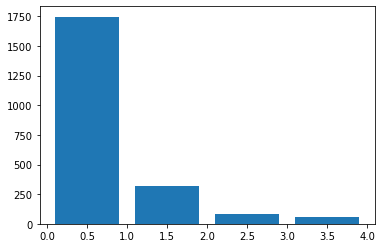

In [14]:
# A feature AcceptedCmpOverall parece ser relevante, segundo modelo de Nailson. Como será que é sua distribuição?
plt.hist(ifood_df.AcceptedCmpOverall, bins = 4, rwidth=0.8)


A grande maioria das pessoas não aceita as campanhas

In [15]:
# Separando o data frame principal em dois outros: aqueles que aceitaram e os que não aceitaram a campanha
df0 = ifood_df[ifood_df.Response==1]
df1 = ifood_df[ifood_df.Response==0]

Text(0, 0.5, 'Number of Store Purchases')

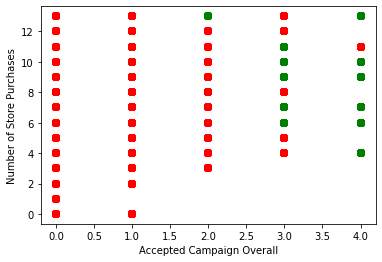

In [16]:
# Plotando duas variáveis e colorindo. As verdes são aquelas que aceitaram a campanha, as vermelhas não aceitaram
plt.scatter(df0['AcceptedCmpOverall'],df0['NumStorePurchases'], color='green', marker='+',linewidths=8)
plt.scatter(df1['AcceptedCmpOverall'],df1['NumStorePurchases'], color='red', marker='+',linewidths=8)
plt.xlabel('Accepted Campaign Overall')
plt.ylabel('Number of Store Purchases')

Pode-se observar que valores mais altos da variável AcceptedCmpOverall e mais altos de NumStorePurchases podem estar relacionados com a Response (se aceitam ou não as campanhas).

# Modelo com Regressão Logística

In [17]:
from sklearn.linear_model import LogisticRegression

# criando o classificador
clf = LogisticRegression(random_state=0, max_iter=10000).fit(X_train, y_train)

In [18]:
# previsão do y usando modelo classificador no conjunto de validação
y_pred = clf.predict(X_validation)

In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
confusion_matrix(y_validation, y_pred)

array([[224,   4],
       [ 18,  19]])

Confusion matrix indica que modelo é adequado. 224 verdadeiros negativos e 19 verdadeiros positivos, com 18 falsos negativos e 4 falsos positivos

In [21]:
from sklearn.metrics import accuracy_score

accuracy_score(y_validation, y_pred)

0.9169811320754717

Acurácia do modelo de regressão é maior que solução base-line. Deverá ser testado no conjunto de teste

In [22]:
# criando dataframe para ver os coeficientes de cada feature
df_coef = pd.DataFrame()
df_coef['colunas'] = clf.feature_names_in_
df_coef = df_coef.set_index('colunas')
df_coef['coefs'] = clf.coef_.T

# calculando a importância de cada coeficiente usando o desvio padrão de cada variável
df_coef['norm'] = df_coef.coefs*np.std(X_train, axis = 0)

# transformando a importância para valores absolutos
df_coef['norm_abs'] = abs(df_coef['norm'])

# checando quais são as features com maiores pesos relativos na Regressão Logística, indicado pela coluna norm_abs.
# as outras colunas do df foram omitidas
df_coef.drop(columns=['coefs','norm']).sort_values(by='norm_abs', ascending=False).head(10).style.background_gradient(cmap='coolwarm', low=1, high=0)

As features mais importantes no modelo de regressão logística podem ser comparadas com aquelas obtidas por Nailson

# Modelo com SVM

In [23]:
from sklearn import svm

In [24]:
# usando a função svm.SVC(), sem especificar parâmetros, o score do classificador é 0.860377
clf_svm = svm.SVC(C=100, kernel='linear')

In [25]:
# kernel = linear, C = 100
start_time = time.time()
clf_svm.fit(X_train,y_train)

print(time.time() - start_time)

133.01355028152466


In [26]:
# kernel = linear, C = 100
clf_svm.score(X_validation,y_validation)

0.8867924528301887

Mudar o parâmetro C gera uma pequena melhoria no score do modelo. Usando o valor defaut C=1 temos um score de 0.860377, e o melhor score encontrado foi com C=100, com score de 0.864151. Faz sentido aumentar o valor de C nesse caso, pois quanto maior o valor de C, menor a regularização e portanto menos complexo é o modelo e menor a chance de overfiting.

Mudar o parâmetro kernel gerou os mesmos scores do kernel padrão (rbf), exceto com o kernel = linear. Apesar de ter demorado mais para treinar o modelo, cerca de 160 segundos, o score melhorou para 0.88679, com o valor de C=100. Usando o kernel linear e o valor defaut de C=1, o score do modelo ficou em 0.88301 e demorou cerca de 58s para o treinamento. Usando o kernel linear, com C=0.1 resultou em um score mais baixo de 0.871698  


# Modelo com Rede Neural

In [27]:
from sklearn.neural_network import MLPClassifier

In [28]:
MLP = MLPClassifier(hidden_layer_sizes=(10, 10, 10, 10, 10), max_iter=100, random_state=5)
MLP.fit(X_train,y_train)
print(f'{MLP.score(X_validation,y_validation) = }')
MLP_pred = MLP.predict(X_validation)
confusion_matrix(y_validation,MLP_pred)

MLP.score(X_validation,y_validation) = 0.8603773584905661


array([[228,   0],
       [ 37,   0]])

O classificador Multi Layer Perceptron variou bastante quando rodado algumas vezes com os mesmos parâmetros. O melhor score foi de 0.860377, com hidden_layer_sizes = (10, 10, 10) e max_iter = 1000

Vale notar que, com esses parâmetros (hidden_layer_sizes=(10,10,10) e max_iter=1000) e um score de 0.860377, a matriz de confusão indica que todo dado de validação é classificado como negativo. Isso levou a um questionamento acerca da validade do modelo

O modelo MLP é sensível em relação à escala das features. Como os valores máximos e mínimos dessas features são muito distintos, é preferível normalizá-las:

In [29]:
# Normalizando as features para o modelo MLP

mean = X_train.mean(axis=0)
std = X_train.std(axis=0)


X_train_MLP = X_train - mean
X_train_MLP /= std
X_validation_MLP = X_validation - mean
X_validation_MLP /= std


# Removendo colunas com NaNs

X_train_MLP = X_train_MLP.drop(columns=['Z_CostContact','Z_Revenue'])
X_validation_MLP = X_validation_MLP.drop(columns=['Z_CostContact','Z_Revenue'])

In [30]:
MLP = MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=100, batch_size=50, random_state=5)
MLP.fit(X_train_MLP,y_train)
print(f'{MLP.score(X_validation_MLP,y_validation) = }')
MLP_pred = MLP.predict(X_validation_MLP)
confusion_matrix(y_validation,MLP_pred)

MLP.score(X_validation_MLP,y_validation) = 0.9018867924528302


array([[216,  12],
       [ 14,  23]])

O modelo com as features normalizadas classifica melhor o conjunto de validação e faz mais sentido quando levando em conta a matriz de confusão. Com os parâmetros (hidden_layer_sizes=(100, 100, 100), max_iter=100, batch_size=50, random_state=5) o score do modelo é 0.901887 e o modelo não classifica todos os dados como negativos.

Agora podemos fazer uma grid search, usando alguns parâmetros que se mostraram relevantes quando testados de forma exploratória

In [31]:
param_grid_MLP = {
    'hidden_layer_sizes': [[100,100,100],[10,10,10]],
    'max_iter': [1000],
    'batch_size' : [100,500],
    'learning_rate_init' : [0.001, 0.01],
    'activation' : ['identity', 'relu', 'tanh']
}

In [32]:
MLP_best = GridSearchCV(MLPClassifier(), param_grid=param_grid_MLP, verbose=2, n_jobs=2)
MLP_best.fit(X_train_MLP,y_train)
print(f'{MLP_best.score(X_validation_MLP,y_validation) = }')

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/home/mpaiva/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, batch_size=100, hidden_layer_sizes=[100, 100, 100], learning_rate_init=0.001, max_iter=1000; total time=   3.6s
[CV] END activation=identity, batch_size=100, hidden_layer_sizes=[100, 100, 100], learning_rate_init=0.001, max_iter=1000; total time=   1.3s
[CV] END activation=identity, batch_size=100, hidden_layer_sizes=[100, 100, 100], learning_rate_init=0.001, max_iter=1000; total time=   2.4s
[CV] END activation=identity, batch_size=100, hidden_layer_sizes=[100, 100, 100], learning_rate_init=0.01, max_iter=1000; total time=   2.2s
[CV] END activation=identity, batch_size=100, hidden_layer_sizes=[100, 100, 100], learning_rate_init=0.01, max_iter=1000; total time=   2.4s
[CV] END activation=identity, batch_size=100, hidden_layer_sizes=[100, 100, 100], learning_rate_init=0.01, max_iter=1000; total time=   2.5s
[CV] END activation=identity, batch_size=100, hidden_layer_sizes=[10, 10, 10], learning_rate_init=0.01, max_iter=1000; total time=   0.4s
[CV] END acti

In [33]:
print(f'{MLP_best.score(X_validation_MLP,y_validation) = }')

MLP_best.score(X_validation_MLP,y_validation) = 0.9132075471698113


O score foi o mais alto encontrado até agora usando o conjunto de validação.

# Como será a acurácia dos outros modelos usando a mesma padronização feita para a rede neural?

In [47]:
# para o modelo SVM

clf_svm_pad = svm.SVC(C=100, kernel='linear')

start_time = time.time()
clf_svm_pad.fit(X_train_MLP,y_train)

print(time.time() - start_time)

print(f'{clf_svm_pad.score(X_validation_MLP,y_validation) = }')

4.424463987350464
clf_svm_pad.score(X_validation_MLP,y_validation) = 0.9245283018867925


O modelo SVM com as variáveis padronizadas foi treinado muito mais rápido, 4.4s em comparação com 160s. Além disso, teve um score mais alto também, inclusive pontuou mais que a rede neural

In [48]:
# para o modelo de regressão logística

clf_pad = LogisticRegression(random_state=0, max_iter=10000).fit(X_train_MLP, y_train)
print(f'{clf_pad.score(X_validation_MLP, y_validation) = }')


clf_pad.score(X_validation_MLP, y_validation) = 0.9283018867924528


O modelo de regressão logística com as variáveis padronizadas também teve um score mais alto do que o obtido com as features não padronizadas. Ao que tudo indica, a padronização é bem vinda para esse conjunto de dados.

Sendo assim, os modelos com as features padronizadas serão usados no conjunto de teste

# Agora que descobrimos os melhores modelos, vamos ver como é a importância das principais features de cada modelo

Para a Rede Neural, entretanto, não é tão simples de encontrar a importância de cada feature. Por isso essa análise não foi feita para o classificador Multi Layer Perceptron

In [49]:
# Principais features da Regressão Logística com features padronizadas

# criando dataframe para ver os coeficientes de cada feature
df_coef_RegLogPad = pd.DataFrame()
df_coef_RegLogPad['colunas'] = clf_pad.feature_names_in_
df_coef_RegLogPad = df_coef_RegLogPad.set_index('colunas')
df_coef_RegLogPad['coefs'] = clf_pad.coef_.T

# calculando a importância de cada coeficiente usando o desvio padrão de cada variável
df_coef_RegLogPad['norm'] = df_coef_RegLogPad.coefs*np.std(X_train_MLP, axis = 0)

# transformando a importância para valores absolutos
df_coef_RegLogPad['norm_abs'] = abs(df_coef_RegLogPad['norm'])

# criando uma variável com as dez features mais importantes na Regressão Logística, indicado pela coluna norm_abs.
# as outras colunas do df foram omitidas
tmif_reglogpad = df_coef_RegLogPad.drop(columns=['coefs','norm']).sort_values(by='norm_abs', ascending=False).head(10).style.background_gradient(cmap='coolwarm', low=1, high=0)

# visualização das 10 features mais importantes para RegLog
tmif_reglogpad

In [51]:
# Principais features do modelo SVM com features padronizadas

# criando dataframe para ver os coeficientes de cada feature
df_coef_SVMPad = pd.DataFrame()
df_coef_SVMPad['colunas'] = clf_svm_pad.fit(X_train_MLP,y_train).feature_names_in_
df_coef_SVMPad = df_coef_SVMPad.set_index('colunas')
df_coef_SVMPad['coefs'] = clf_svm_pad.fit(X_train_MLP,y_train).coef_.T

# calculando a importância de cada coeficiente usando o desvio padrão de cada variável
df_coef_SVMPad['norm'] = df_coef_SVMPad.coefs*np.std(X_train_MLP, axis = 0)

# transformando a importância para valores absolutos
df_coef_SVMPad['norm_abs'] = abs(df_coef_SVMPad['norm'])

# criando uma variável com as dez features mais importantes no SVM, indicado pela coluna norm_abs.
# as outras colunas do df foram omitidas
tmif_svmpad = df_coef_SVMPad.drop(columns=['coefs','norm']).sort_values(by='norm_abs', ascending=False).head(10).style.background_gradient(cmap='coolwarm', low=1, high=0)

# visualização das 10 features mais importantes para SVM
tmif_svmpad

In [52]:
# construindo um df com as variáveis mais importantes de cada modelo, em ordem decrescente

tmif = pd.DataFrame()
tmif['Random Forest'] = tmif_rf.index
tmif['RegLog Padronizado'] = tmif_reglogpad.index
tmif['SVM Padronizado'] = tmif_svmpad.index
tmif

Random Forest   RegLog Padronizado     SVM Padronizado
0             Recency              Recency   NumStorePurchases
1       Customer_Days    NumStorePurchases             Recency
2  AcceptedCmpOverall        Customer_Days       Customer_Days
3              Income             Teenhome            Teenhome
4            MntWines  NumCatalogPurchases   NumDealsPurchases
5     MntRegularProds      MntMeatProducts     MntMeatProducts
6            MntTotal   AcceptedCmpOverall  AcceptedCmpOverall
7     MntMeatProducts    NumDealsPurchases        AcceptedCmp1
8        MntGoldProds        education_PhD        AcceptedCmp5
9                 Age         AcceptedCmp5       education_PhD

A variável Recency (dias desde a última compra) apareceu como a mais importante em dois dos modelos para os quais foi feita a análise de importância. Outras variáveis que parecem ser importantes são Customer_Days (número de dias passados desde quando virou usuário do ifood), NumStorePurchases (número de compras feitas diretamente nas lojas), AcceptedCmpOverall (mede o grau de aceitação das campanhas), MntMeatProducts (quantia gasta em produtos carnívoros) e Teenhome (número de adolescentes em casa).

Conclui-se portanto que essas são variáveis relevantes para a manutenção da base de dados.

# Agora podemos testar os modelos com o conjunto de teste

A padronização de features exigiu que duas features fossem excluídas do modelo. Sendo assim, precisamos criar uma variável X_test_pad, que tira essa features no conjunto

In [53]:
X_test_pad = X_test - mean
X_test_pad /= std

X_test_pad = X_test_pad.drop(columns=['Z_CostContact','Z_Revenue'])

In [54]:
# score da RegLog com features padronizadas
print(f'{clf_pad.score(X_test_pad, y_test) = }')

clf_pad.score(X_test_pad, y_test) = 0.8888888888888888


In [55]:
# Confusion matrix para RegLog com padronização
y_pred_reglog_pad = clf_pad.predict(X_test_pad)
confusion_matrix(y_test, y_pred_reglog_pad)

array([[723,  27],
       [ 71,  61]])

In [56]:
# score da RegLog sem padronização das features 
print(f'{clf.score(X_test, y_test) = }')

clf.score(X_test, y_test) = 0.891156462585034


In [57]:
# Confusion matrix para RegLog sem padronização
y_pred_reglog = clf.predict(X_test)
confusion_matrix(y_test, y_pred_reglog)

array([[726,  24],
       [ 72,  60]])

In [58]:
# score do SVM com features padronizadas
print(f'{clf_svm_pad.score(X_test_pad, y_test) = }')

clf_svm_pad.score(X_test_pad, y_test) = 0.8900226757369615


In [59]:
# Confusion matrix para SVM com padronização
y_pred_svm_pad = clf_svm_pad.predict(X_test_pad)
confusion_matrix(y_test, y_pred_svm_pad)

array([[729,  21],
       [ 76,  56]])

In [60]:
# score do SVM sem padronização das features
print(f'{clf_svm.score(X_test, y_test) = }')

clf_svm.score(X_test, y_test) = 0.8480725623582767


In [61]:
# Confusion matrix para SVM sem padronização
y_pred_svm = clf_svm.predict(X_test)
confusion_matrix(y_test, y_pred_svm)

array([[717,  33],
       [101,  31]])

Score foi mais baixo que solução baseline, embora algoritmo ainda funcione.

In [62]:
# score do MLP (com padronização das features)
print(f'{MLP_best.score(X_test_pad, y_test) = }')

MLP_best.score(X_test_pad, y_test) = 0.8866213151927438


In [63]:
# Confusion matrix para MLP
y_pred_MLP = MLP_best.predict(X_test_pad)
confusion_matrix(y_test, y_pred_MLP)

array([[732,  18],
       [ 82,  50]])

In [64]:
# por útlimo, vamos ver o algoritmo de Nailson com o conjunto de teste

print(f'{rf_models.score(X_test, y_test) = }')

rf_models.score(X_test, y_test) = 0.8707482993197279


In [65]:
# confusion matrix para algoritmo de Nailson
y_pred_rf = rf_models.predict(X_test)
confusion_matrix(y_test, y_pred_rf)

array([[735,  15],
       [ 99,  33]])

# Resultados e discussão

Os algoritmos de classificação usados para resolução do problema a fim de compará-lo com a solução baseline (Random Forest) foram Regressão Logística, Support Vector Machines (SVM) e Multi Layer Perceptron (MLP). A necessidade de padronizar as features para treinamento da rede neural (MLP) gerou ainda curiosidade em relação a acurácia dos outros modelos com as variáveis padronizadas. Com isso, além da solução baseline, foram usado no conjunto de teste 5 modelos: regressão logística com features padronizadas e não padronizadas, SVM com features padronizadas e não padronizadas e o MLP. 

O modelo de regressão logística parece ser o mais adequado para classificação desses dados. No conjunto de validação, o maior score entre os modelos foi o da regressão logística com as features padronizadas. No conjunto de teste, o melhor modelo foi a regressão logística sem a padronização das features. A princípio, esse seria o modelo recomendado para a classificação de dados futuros, mas vale ressaltar que a matriz de confusão pode trazer insights sobre cada modelo. Por exemplo, se quiserem ser evitados falsos negativos, a regressão logística pode ainda ser atraente, mas se quiserem evitar os falsos positivos, a solução de Nailson (random forest) parece ser mais adequada.

Os scores dos modelos foram parecidos, não trazendo muitas melhorias em relação a solução base-line. O menor valor encontrado foi pelo modelo de SVM sem padronização das variáveis, com um score de 0.8480725623582767. O maior score encontrado foi de 0.891156462585034 com o modelo de regressão logística sem padronização das variáveis. A solução base-line apresenta score de 0.870748299319727. Os hiperparâmetros não foram alterados a fim de melhorar a acurácia dos modelos com o conjunto de testes, embora alguns ajustes tenham sido feitos para garantir que os modelos estivessem trabalhando corretamente (por um erro o MLP estava classificando todos dados como negativos).



